In [15]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/zalig/cu-datasets/main/golden_mine.csv')
df.sort_values('Profit', ascending=False)

,Payments,Costs,Profit,Age,Gender,AgeGroup
8322,6654600,10650,6643950,31,male,25-39
2941,145250,35750,109500,21,male,18-24
8420,139100,33150,105950,22,male,18-24
7408,137950,32700,105250,21,male,18-24
6378,143400,39500,103900,22,male,18-24
...,...,...,...,...,...,...
606,7350,14350,-7000,28,FEMALE,25-39
8572,8400,15550,-7150,25,female,25-39
4698,6800,16600,-9800,36,Female,25-39
3179,6750,16950,-10200,33,male,25-39


In [16]:
df['Gender'] = df['Gender'].str.lower()
df= df[(df['Profit']>-20_000) & (df['Profit']<200_000)]

df.describe()

,Payments,Costs,Profit,Age
count,8713.000000,8713.000000,8713.000000,8713.000000
mean,29338.987719,13583.891886,15755.095834,22.390566
std,27337.374592,8039.308785,20125.911277,5.876229
min,3750.000000,3500.000000,-10200.000000,18.000000
25%,10800.000000,8350.000000,2500.000000,18.000000
50%,19850.000000,11450.000000,7850.000000,19.000000
75%,40050.000000,15350.000000,23750.000000,25.000000
max,148300.000000,54350.000000,109500.000000,49.000000


#среднее значение профита среди всех

In [17]:
df['Profit'].agg('mean')

15755.095833811545

,count
AgeGroup,
18-24,6391
25-39,2231
40+,91


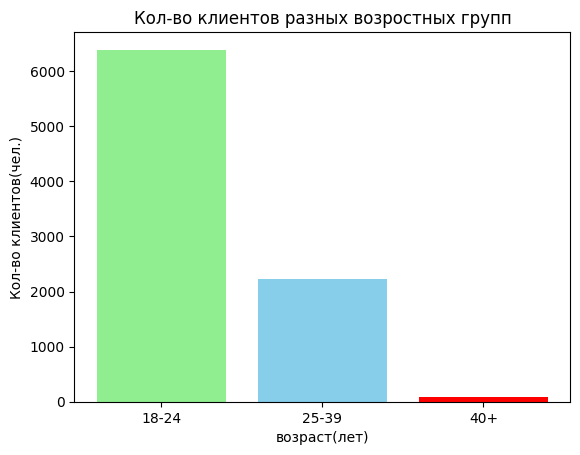

In [18]:

ag_count = df['AgeGroup'].value_counts()

plt.bar(x=ag_count.index, height=ag_count.values, color = ['lightgreen','skyblue', 'red'])
plt.xlabel("возраст(лет)")
plt.ylabel("Кол-во клиентов(чел.)")
plt.title("Кол-во клиентов разных возростных групп")

ag_count

In [29]:
df

,Payments,Costs,Profit,Age,Gender,AgeGroup
0,9400,8100,1300,19,male,18-24
1,26600,13900,12700,29,male,25-39
2,9750,6750,3000,20,male,18-24
3,29700,11200,18500,18,female,18-24
4,49700,10450,39250,21,female,18-24
...,...,...,...,...,...,...
8710,8650,8600,50,18,male,18-24
8711,45350,14350,31000,19,female,18-24
8712,41700,9900,31800,18,female,18-24
8713,120600,49650,70950,21,male,18-24


In [30]:
grouped = df.groupby(['AgeGroup','Gender'])
AgG_Gen_Pr_Groupby = grouped.agg({'Profit': 'mean'})
AgG_Gen_Pr_Groupby.index

MultiIndex([('18-24', 'female'),
            ('18-24',   'male'),
            ('25-39', 'female'),
            ('25-39',   'male'),
            (  '40+', 'female'),
            (  '40+',   'male')],
           names=['AgeGroup', 'Gender'])

In [91]:
grouped = df.groupby(['AgeGroup','Gender'])
AgG_Gen_Pr_Groupby = grouped.agg({'Profit': 'mean'})

#превращаем
AgG_Gen_Pr_Groupby.index = [f"{item[1].capitalize()} / {item[0]} y.o." for item in AgG_Gen_Pr_Groupby.index]



# plt.bar(x=ag_count.index, height=ag_count.values, color = ['lightgreen','skyblue', 'red'])
# plt.xlabel("возраст(лет)")
# plt.ylabel("Кол-во клиентов(чел.)")
# plt.title("Кол-во клиентов разных возростных групп")



# plt.bar(x = pivot_df_prof[],)

AgG_Gen_Pr_Groupby


,Profit
Female / 18-24 y.o.,26278.373894
Male / 18-24 y.o.,13155.762435
Female / 25-39 y.o.,7879.496700
Male / 25-39 y.o.,7927.821394
Female / 40+ y.o.,-343.750000
Male / 40+ y.o.,184.210526


,Profit
Женщины,26278.373894
Мужчины,13155.762435


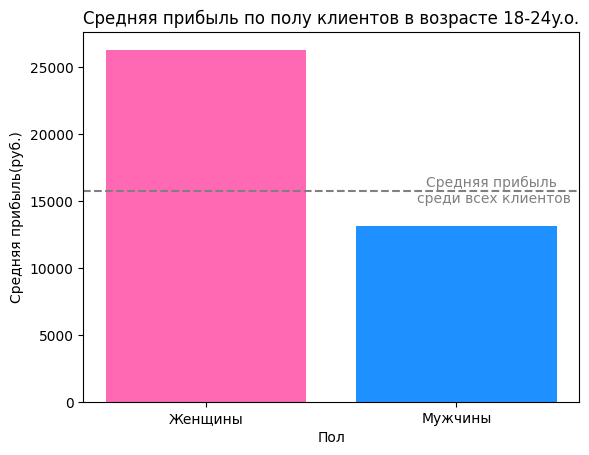

In [92]:
# повторяем
grouped = df.groupby(['AgeGroup','Gender'])
AgG_Gen_Pr_Groupby = grouped.agg({'Profit': 'mean'})
AgG_Gen_Pr_Groupby.index = [f"{item[1].capitalize()} / {item[0]} y.o." for item in AgG_Gen_Pr_Groupby.index]

axisX = AgG_Gen_Pr_Groupby.iloc[:2]
axisX = axisX.rename(index = { 'Female / 18-24 y.o.' : 'Женщины', 'Male / 18-24 y.o.' : 'Мужчины'})
plt.bar(x = axisX.index , height = axisX['Profit'].values, color = ['hotpink', 'dodgerblue'])

#называяем оси и график
plt.xlabel("Пол")
plt.ylabel("Средняя прибыль(руб.)")
plt.title("Средняя прибыль по полу клиентов в возрасте 18-24y.o.")

#наносим линию среднего профита
plt.axhline(y=15755.095833811545, linestyle='--', color='gray')
plt.text(x=1.15, y=15755.095833811545 , s='''Средняя прибыль
среди всех клиентов''', ha='center', va='center', color='gray')

#сохраняем в формате png
plt.savefig('график мж 18-24.png')


axisX

,Profit
Женщины(18-24),26278.373894
Мужчины(18-24),13155.762435
Женщины(25-39),7879.496700
Мужчины(25-39),7927.821394
Женщины(40+),-343.750000
Мужчины(40+),184.210526


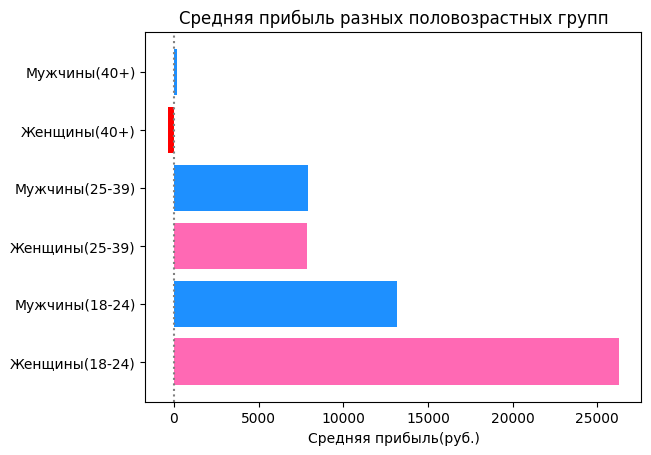

In [121]:
# повторяем
grouped = df.groupby(['AgeGroup','Gender'])
AgG_Gen_Pr_Groupby = grouped.agg({'Profit': 'mean'})
AgG_Gen_Pr_Groupby.index = [f"{item[1].capitalize()} / {item[0]} y.o." for item in AgG_Gen_Pr_Groupby.index]


AgG_Gen_Pr_Groupby = AgG_Gen_Pr_Groupby.rename(index = { 'Female / 18-24 y.o.' : 'Женщины(18-24)',
                                                        'Male / 18-24 y.o.' : 'Мужчины(18-24)',
                                                        'Female / 25-39 y.o.' : 'Женщины(25-39)',
                                                        'Male / 25-39 y.o.'  : 'Мужчины(25-39)',
                                                        'Female / 40+ y.o.' : 'Женщины(40+)',
                                                        'Male / 40+ y.o.' : 'Мужчины(40+)'
                                                        })
colors = []
for i in range(len(AgG_Gen_Pr_Groupby)):
  if i == 4:
    colors.append('r')
  elif i % 2 == 0:
    colors.append('hotpink')
  else:
    colors.append('dodgerblue')


plt.barh(y = AgG_Gen_Pr_Groupby.index, width = AgG_Gen_Pr_Groupby['Profit'].values, color = colors) #['hotpink', 'dodgerblue'])
plt.title('Средняя прибыль разных половозрастных групп')
plt.xlabel('Средняя прибыль(руб.)')

#наносим линию 0 профита
plt.axvline(x = 0, linestyle = ':', color = 'gray')

# ax = plt.gca()
# ax.set_facecolor('cyan')
# plt.gcf().set_facecolor('yellow')

#сохраняем в формате png
plt.savefig('график прибыль половозрастных групп.png')

AgG_Gen_Pr_Groupby

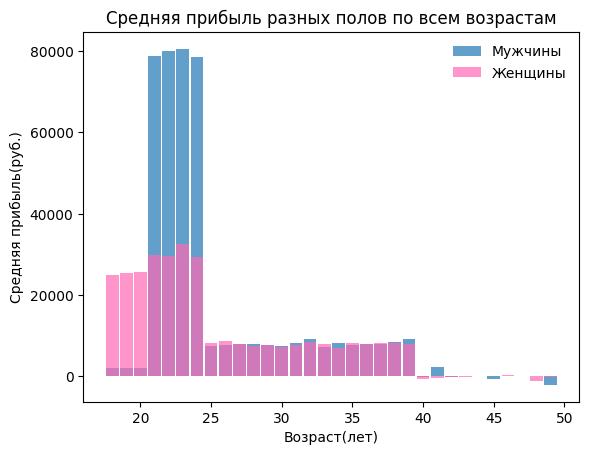

In [228]:
pivot_prof_allAg = df.pivot_table(index = 'Age', columns = 'Gender', values = 'Profit', aggfunc = 'mean')
pivot_prof_allAg_m = pivot_prof_allAg['male']
pivot_prof_allAg_f = pivot_prof_allAg['female']

plt.bar(x = pivot_prof_allAg_m.index, height = pivot_prof_allAg_m.values, alpha=0.7, width=0.9, label='Мужчины')
plt.bar(x = pivot_prof_allAg_f.index, height = pivot_prof_allAg_f.values, color = 'hotpink', alpha=0.7, width=0.9, label='Женщины')

plt.title('Средняя прибыль разных полов по всем возрастам')
plt.ylabel('Средняя прибыль(руб.)')
plt.xlabel('Возраст(лет)')
plt.legend(loc = 'upper right', frameon=False)

plt.savefig('график прибыль для всех возростов.png')

# pivot_prof_allAg_m

Кол-во мужчин возраста 18: 1515
Кол-во мужчин возраста 19: 975
Кол-во мужчин возраста 20: 660
Кол-во мужчин возраста 21: 298
Кол-во мужчин возраста 22: 100
Кол-во мужчин возраста 23: 85
Кол-во мужчин возраста 24: 46
      


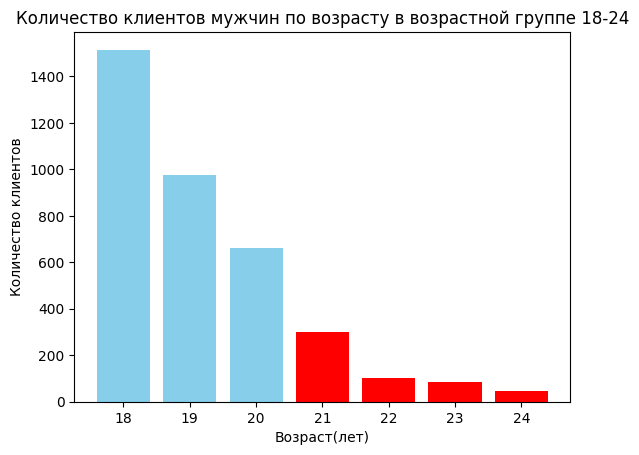

In [229]:
m18 = df[(df['Age'] == 18) & (df['Gender']=='male')]
m18_cnt = m18['Age'].agg('count')

m19 = df[(df['Age'] == 19) & (df['Gender']=='male')]
m19_cnt = m19['Age'].agg('count')

m20 = df[(df['Age'] == 20) & (df['Gender']=='male')]
m20_cnt = m20['Age'].agg('count')

m21 = df[(df['Age'] == 21) & (df['Gender']=='male')]
m21_cnt = m21['Age'].agg('count')

m22 = df[(df['Age'] == 22) & (df['Gender']=='male')]
m22_cnt = m22['Age'].agg('count')

m23 = df[(df['Age'] == 23) & (df['Gender']=='male')]
m23_cnt = m23['Age'].agg('count')

m24 = df[(df['Age'] == 24) & (df['Gender']=='male')]
m24_cnt = m24['Age'].agg('count')

print(f'''Кол-во мужчин возраста 18: {m18_cnt}
Кол-во мужчин возраста 19: {m19_cnt}
Кол-во мужчин возраста 20: {m20_cnt}
Кол-во мужчин возраста 21: {m21_cnt}
Кол-во мужчин возраста 22: {m22_cnt}
Кол-во мужчин возраста 23: {m23_cnt}
Кол-во мужчин возраста 24: {m24_cnt}
      ''')
col = ['skyblue', 'skyblue', 'skyblue', 'r', 'r', 'r', 'r']
m18_24_cnt = [m18_cnt, m19_cnt, m20_cnt, m21_cnt, m22_cnt, m23_cnt, m24_cnt]
plt.bar( ['18','19', '20', '21', '22', '23', '24'], m18_24_cnt, color = col)
df_m18_24_cnt

plt.title('Количество клиентов мужчин по возрасту в возрастной группе 18-24')
plt.ylabel('Количество клиентов')
plt.xlabel('Возраст(лет)')

plt.savefig('Кол-во мужчин 18-24.png')

In [237]:
print((m21_cnt + m22_cnt + m23_cnt + m24_cnt)/sum(m18_24_cnt))

0.14378907311769504
